## Homework 2: Parabolic trajectories

- Solve the equations of motion for ($x(t),z(t)$) for a point mass in a parabolic trajectory (no drag) with initial velocity ($v_{x0},v_{z0}$). Determine time-of-flight, peak height, and distance as a function of launch angle $\alpha$. (This part is analytical, no coding needed).  Typeset solutions encouraged here (but not required!).

--------------------------------------------------------------------------------
Time-of-flight is solved by knowing when $z_0 = 0$ and $z = 0$.

Thus, solving this equation (representing vertical displacment) when $z = 0$:
$z = z_0 + v_zt + at^2 \implies z = z_0 + vsin(\theta)t + at^2$

$z_0$ is also equal to zero, therefore:
$- vsin(\theta)t = -g*t^2$

The projectile will be going $v_z$ twice during the whole flight. Thus giving us the final equation of,

Time_Of_Flight $= \frac{2*v*sin(\theta)}{g}$.

---------------------------------------------------
Peak Height is solved by knowing when $v_z$ is zero.

Thus, solving this equation (representing vertical displacement) when $v_z = 0$ and $z_0 = 0$:
$z = z_0 + v_zt + \frac{1}{2}at^2 \implies z_{peak} = z_0 + \frac{1}{2}at^2$

with $v_z = v_{z} + \frac{1}{2}a*t \implies t_{peak} = \frac{-v_{z}}{g}$
$\implies t_{peak} = \frac{-vsin(\theta)}{g}$

Thus, creating the equation (where $a = g$):
$z = z_0 + \frac{1}{2}g(\frac{-vsin(\theta)}{g})^2$

$z_0$ is also equal to zero, therefore:
$z = \frac{1}{2}g(\frac{-vsin(\theta)}{g})^2$

Which simplifies to: $z = \frac{v^2 sin^2(\theta)}{2g}$

Therefore the Peak Height:

Peak_Height $= \frac{v^2 sin^2(\theta)}{2g}$

---------------------------------------------------
Range is equal to $v_x * t$ (time of flight)

Thus, multiplying  $v*cos(\theta) * \frac{2*v*sin(\theta)}{g}$ will get you the range.

Range $= \frac{v^2}{g} * 2sin(\theta)cos(\theta)$.

Alternitively, it can be written as:

Range $= \frac{v^2*sin(2\theta)}{g}$.

------------------------------------------------------

- Write a Python function that takes the launch angle and speed as an input and calculates range, peak height, and time of flight. You do not need to solve the ODEs numerically, just use your analytical solutions for ($x(t), z(t)$).
Use this function to produce a graph that shows range as a function of launch angle for a given speed, say 50 m s$^{−1}$. Plot your result. On the figure identify (approximately) the range at which the sensitivity to launch angle is smallest (that is where small changes in angle don’t have such a large effect on range).

The max height being 254.7110642713272


Text(0, 0.5, 'Max Height Reached')

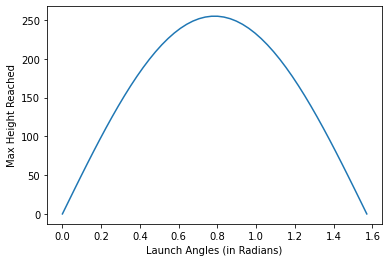

In [4]:
# Function that returns range, peak height, and time of flight

#Equations of Motion:
# x = distance
# v = x/t
# a = v/t
# x = x0 + v*t + a*t^2  
# z = z0 + v*t + a*t^2  #Finds the max height when v_Z is equal to zero.
# v = v0 + a*t
# v^2 = v0^2 + 2*a*dt

import numpy as np
from matplotlib import pyplot as plt

# define variables and constants etc.
g = 9.81                #gravitational acceleration in m/s
alpha = (np.pi)/4       #launch angle (in radians)
v0 = 50                 #initial velocity (in meters/sec)
vx0 = v0*np.cos(alpha)  #x component
vz0 = v0*np.sin(alpha)  #z component

#1st slot = range (x-displacment), 2nd = peak height, 3rd = time of flight
ProjectileMotionData = np.zeros(3)

#Launch Angles (in Radians):[0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3, 5*np.pi/6, pi]
#We divide this by two since in the range equation we multiply the angle by two. Thus this will show the angles between 0 and 90 degrees
alpha_values = np.linspace(0,np.pi/2,50) #You can change 7 which will give you a higher or lower resolution graph
R_alpha_vals = np.zeros(len(alpha_values))

#Function: Solves for the Range, Peak Height, and Time of Flight.
#Parameters: Angle (in radians) and Initial Velocity
#Returns: Range using initial angle and velocity
def ProjectileMotionSolver(theta_i, v_i):
  ProjectileMotionData[0] = (v_i**2)*(np.sin(2*theta_i))/(9.81)
  ProjectileMotionData[1] = (v_i**2)*(np.sin(theta_i))**2/(2*9.81)
  ProjectileMotionData[2] = 2*v_i*np.sin(theta_i)/(9.81)
  return ProjectileMotionData[0] #Range
  
for i in range(len(alpha_values)):
  R_alpha_vals[i] = ProjectileMotionSolver(alpha_values[i],v0)
  
Max_Range = max(R_alpha_vals)
print(f"The max height being {Max_Range}")
plt.plot(alpha_values, R_alpha_vals)
plt.xlabel("Launch Angles (in Radians)")
plt.ylabel("Max Height Reached")